In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("New_York_City_Restaurant_Inspection_Results.csv")

In [ ]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40873175,CRAFT,MANHATTAN,4347,EAST 19 STREET,10003.0,2127800880,American,09/27/2019,Violations were cited in the following area(s).,02B,hot food item not held at or above 140º f.,Critical,14,B,09/27/2019,11/04/2022,Cycle Inspection / Re-inspection
1,41071308,RADIO CITY MUSIC HALL,MANHATTAN,1260,AVENUE OF THE AMERICAS,10020.0,2124857200,American,06/15/2016,No violations were recorded at the time of thi...,0,no violations,Not Applicable,0,A,06/15/2016,11/04/2022,Cycle Inspection / Initial Inspection
2,41510846,218 RESTAURANT,MANHATTAN,218220,GRAND STREET,10013.0,2122268039,Chinese,02/02/2022,Establishment re-opened by DOHMH.,0,no violations,Not Applicable,0,Z,02/02/2022,11/04/2022,Cycle Inspection / Reopening Inspection
3,41276645,ECUATORIANA RESTAURANT,MANHATTAN,16851687,AMSTERDAM AVENUE,10031.0,2124914626,Spanish,02/17/2022,Violations were cited in the following area(s).,02B,hot food item not held at or above 140º f.,Critical,32,NaN,NaN,11/04/2022,Cycle Inspection / Initial Inspection
4,40873175,CRAFT,MANHATTAN,4347,EAST 19 STREET,10003.0,2127800880,American,03/03/2020,Violations were cited in the following area(s).,02B,hot food item not held at or above 140º f.,Critical,26,NaN,NaN,11/04/2022,Cycle Inspection / Initial Inspection


In [ ]:
data["INSPECTION TYPE"].nunique()

32

In [ ]:
data.shape

(581470, 18)

In [ ]:
data.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [ ]:
data.isna().sum()

CAMIS                         0
DBA                           0
BORO                          0
BUILDING                    687
STREET                        0
ZIPCODE                       1
PHONE                         9
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE              320
VIOLATION DESCRIPTION       349
CRITICAL FLAG                 0
SCORE                         0
GRADE                    279393
GRADE DATE               288415
RECORD DATE                   0
INSPECTION TYPE               0
dtype: int64

In [ ]:
# # data=data.drop(columns=['Location Point', 'Zip Codes', 'Community Districts',
#        'Borough Boundaries', 'City Council Districts', 'Police Precincts'],axis=1)

In [ ]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40873175,CRAFT,MANHATTAN,4347,EAST 19 STREET,10003.0,2127800880,American,09/27/2019,Violations were cited in the following area(s).,02B,hot food item not held at or above 140º f.,Critical,14,B,09/27/2019,11/04/2022,Cycle Inspection / Re-inspection
1,41071308,RADIO CITY MUSIC HALL,MANHATTAN,1260,AVENUE OF THE AMERICAS,10020.0,2124857200,American,06/15/2016,No violations were recorded at the time of thi...,0,no violations,Not Applicable,0,A,06/15/2016,11/04/2022,Cycle Inspection / Initial Inspection
2,41510846,218 RESTAURANT,MANHATTAN,218220,GRAND STREET,10013.0,2122268039,Chinese,02/02/2022,Establishment re-opened by DOHMH.,0,no violations,Not Applicable,0,Z,02/02/2022,11/04/2022,Cycle Inspection / Reopening Inspection
3,41276645,ECUATORIANA RESTAURANT,MANHATTAN,16851687,AMSTERDAM AVENUE,10031.0,2124914626,Spanish,02/17/2022,Violations were cited in the following area(s).,02B,hot food item not held at or above 140º f.,Critical,32,NaN,NaN,11/04/2022,Cycle Inspection / Initial Inspection
4,40873175,CRAFT,MANHATTAN,4347,EAST 19 STREET,10003.0,2127800880,American,03/03/2020,Violations were cited in the following area(s).,02B,hot food item not held at or above 140º f.,Critical,26,NaN,NaN,11/04/2022,Cycle Inspection / Initial Inspection


In [ ]:
data['VIOLATION DESCRIPTION']

0                hot food item not held at or above 140º f.
1                                             no violations
2                                             no violations
3                hot food item not held at or above 140º f.
4                hot food item not held at or above 140º f.
                                ...                        
581465    food contact surface improperly constructed or...
581466          hot food item not held at or above 140âº f.
581467    evidence of mice or live mice present in facil...
581468    plumbing not properly installed or maintained;...
581469    food not protected from potential source of co...
Name: VIOLATION DESCRIPTION, Length: 581470, dtype: object

In [ ]:
data['VIOLATION DESCRIPTION'].isna().sum()

349

In [ ]:
data['VIOLATION DESCRIPTION'][9000]

'facility not vermin proof. harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.'

In [ ]:
data['CRITICAL FLAG'].unique()

array(['Critical', 'Not Applicable', 'Not Critical'], dtype=object)

# **Dropping rows where VIOLATION DESCRIPTION=Null**

In [ ]:
data = data[pd.notnull(data['VIOLATION DESCRIPTION'])]

In [ ]:
data.isna().sum()

CAMIS                         0
DBA                           0
BORO                          0
BUILDING                    686
STREET                        0
ZIPCODE                       1
PHONE                         9
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE                0
VIOLATION DESCRIPTION         0
CRITICAL FLAG                 0
SCORE                         0
GRADE                    279340
GRADE DATE               288361
RECORD DATE                   0
INSPECTION TYPE               0
dtype: int64

In [ ]:
violation=pd.DataFrame()
violation['description']=data['VIOLATION DESCRIPTION']
violation['flag']=data['CRITICAL FLAG']

In [ ]:
violation = violation.drop(violation[violation.flag == "Not Applicable"].index)

In [ ]:
violation=violation.reset_index(drop=True)

In [ ]:
violation.head()

,description,flag
0,hot food item not held at or above 140º f.,Critical
1,hot food item not held at or above 140º f.,Critical
2,hot food item not held at or above 140º f.,Critical
3,hot food item not held at or above 140º f.,Critical
4,hand wash sign not posted,Not Critical


In [ ]:
violation['flag'].unique()

array(['Critical', 'Not Critical'], dtype=object)

In [ ]:
violation['description'][10]

'thawing procedures improper.'

In [ ]:
violation['description'][100]

'hand wash sign not posted'

In [ ]:
violation['description'][1000]

'non-food contact surface improperly constructed. unacceptable material used. non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.'

In [ ]:
violation['description'][10000]

'food protection certificate (fpc) not held by manager or supervisor of food operations.'

In [ ]:
violation['description'][10009]

'cold food item held above 41º f (smoked fish and reduced oxygen packaged foods above 38 ºf) except during necessary preparation.'

# **Encoding the Labels**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
violation['flag_label']= label_encoder.fit_transform(violation['flag'])

In [ ]:
violation.head(10)

,description,flag,flag_label
0,hot food item not held at or above 140º f.,Critical,0
1,hot food item not held at or above 140º f.,Critical,0
2,hot food item not held at or above 140º f.,Critical,0
3,hot food item not held at or above 140º f.,Critical,0
4,hand wash sign not posted,Not Critical,1
5,food contact surface not properly maintained.,Not Critical,1
6,evidence of rats or live rats present in facil...,Critical,0
7,hot tcs food item not held at or above 140 °f.,Not Critical,1
8,hot food item not held at or above 140º f.,Critical,0
9,hot food item not held at or above 140º f.,Critical,0


# **Text Preprocessing**

In [ ]:
import nltk
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
import spacy
from tqdm.auto import tqdm
import re
import string
import html
import unicodedata

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))

def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def replace_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_whitespaces(text):
    return text.strip()

def remove_stopwords(words, stop_words):
  return [word for word in words if word not in stop_words]

def stem_words(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
     lemmatizer = WordNetLemmatizer()
     return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])
    
def text2words(text):
  return word_tokenize(text)

In [ ]:
def cleaned_text( text):
    text = remove_special_chars(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)


In [ ]:
violation['description'] = violation['description'].apply(lambda x: cleaned_text(x))

In [ ]:
violation['description'][100]

'hand wash sign post'

In [ ]:
violation['description'][10]

'thaw procedure improper'

In [ ]:
violation['description'][1000]

'nonfood contact surface improperly construct unacceptable material use nonfood contact surface equipment improperly maintain andor properly seal raise space movable allow accessibility clean side underneath unit'

In [ ]:
violation['description'][10000]

'food protection certificate fpc hold manager supervisor food operation'

In [ ]:
violation['description'][10009]

'cold food item hold º f smoke fish reduce oxygen package food ºf except necessary preparation'

# **Naive Bayes**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
count_vec = CountVectorizer()
bow = count_vec.fit_transform(violation['description'] )
bow = np.array(bow.todense())

In [ ]:
X = bow
y = violation['flag_label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)

In [ ]:
multinomial_nb = MultinomialNB().fit(X_train, y_train)

In [ ]:
y_pred_nb = multinomial_nb.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred_nb))
print('F1 score:', f1_score(y_test, y_pred_nb, average="macro"))

Accuracy: 0.9876618404566337
F1 score: 0.9874098074808928


In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97598
           1       1.00      0.98      0.99     74794

    accuracy                           0.99    172392
   macro avg       0.99      0.99      0.99    172392
weighted avg       0.99      0.99      0.99    172392



## **Bagging -  Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
estimators=[1,5,10,15,20]
rf_accuracy=[]
for i in estimators:
  rf_classifier=RandomForestClassifier(n_estimators = i,criterion="entropy",random_state=0)
  rf_classifier.fit(X_train,y_train)
  y_predicted=rf_classifier.predict(X_test)
  rf_accuracy.append(accuracy_score(y_test, y_predicted))



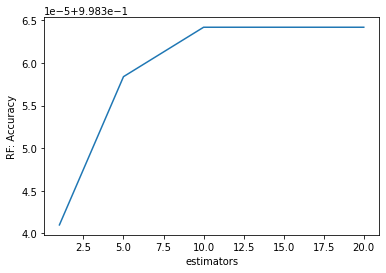

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

estimators=pd.Series(estimators)
rf_accuracy=pd.Series(rf_accuracy)
df=pd.DataFrame()
df['estimators']=estimators.values
df['rf_accuracy']=rf_accuracy.values

sns.lineplot(x="estimators", y="rf_accuracy", data=df)
plt.ylabel("RF: Accuracy")
plt.show()

In [ ]:
rf_classifier = RandomForestClassifier( n_estimators = 10,random_state=0,)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
y_pred_rf=rf_classifier.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('F1 score:', f1_score(y_test, y_pred_rf, average="macro"))

Accuracy: 0.9983641932340248
F1 score: 0.9983343219263403


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97598
           1       1.00      1.00      1.00     74794

    accuracy                           1.00    172392
   macro avg       1.00      1.00      1.00    172392
weighted avg       1.00      1.00      1.00    172392



# **Boosting - Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=1, random_state=0)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=10,
                           random_state=0)

In [ ]:
y_pred_gb=gb_classifier.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_gb))
print('F1 score:', f1_score(y_test, y_pred_gb, average="macro"))

Accuracy: 0.5661399600909555
F1 score: 0.3614874624986111


In [ ]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72     97598
           1       0.00      0.00      0.00     74794

    accuracy                           0.57    172392
   macro avg       0.28      0.50      0.36    172392
weighted avg       0.32      0.57      0.41    172392



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Neural Network - Dense Model**

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

In [ ]:
max_len = 50 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

In [ ]:
X=violation['description']
y=violation['flag_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

599

In [ ]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [ ]:
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [ ]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (402247, 50)
Shape of testing tensor:  (172392, 50)


In [ ]:
import keras.backend as K
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# Define parameter
vocab_size = 500 
embedding_dim = 16
drop_value = 0.2
n_dense = 24
# Define Dense Model Architecture
nn_model = Sequential()
nn_model.add(Embedding(vocab_size,
                    embedding_dim,
                    input_length = max_len))
nn_model.add(GlobalAveragePooling1D())
nn_model.add(Dense(24, activation='relu'))
nn_model.add(Dropout(drop_value))
nn_model.add(Dense(1, activation='sigmoid'))


In [ ]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

In [ ]:
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy',f1_metric])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = nn_model.fit(training_padded,
                    y_train,
                    epochs=num_epochs, 
                    validation_data=(testing_padded, y_test),
                    callbacks =[early_stop],
                    verbose=2)

Epoch 1/30
12571/12571 - 51s - loss: 0.0220 - accuracy: 0.9926 - f1_metric: 0.9881 - val_loss: 0.0065 - val_accuracy: 0.9983 - val_f1_metric: 0.9980 - 51s/epoch - 4ms/step
Epoch 2/30
12571/12571 - 52s - loss: 0.0065 - accuracy: 0.9984 - f1_metric: 0.9981 - val_loss: 0.0064 - val_accuracy: 0.9983 - val_f1_metric: 0.9980 - 52s/epoch - 4ms/step
Epoch 3/30
12571/12571 - 48s - loss: 0.0064 - accuracy: 0.9984 - f1_metric: 0.9981 - val_loss: 0.0074 - val_accuracy: 0.9983 - val_f1_metric: 0.9980 - 48s/epoch - 4ms/step
Epoch 4/30
12571/12571 - 50s - loss: 0.0062 - accuracy: 0.9984 - f1_metric: 0.9981 - val_loss: 0.0063 - val_accuracy: 0.9983 - val_f1_metric: 0.9980 - 50s/epoch - 4ms/step
Epoch 5/30
12571/12571 - 49s - loss: 0.0062 - accuracy: 0.9984 - f1_metric: 0.9981 - val_loss: 0.0064 - val_accuracy: 0.9983 - val_f1_metric: 0.9980 - 49s/epoch - 4ms/step
Epoch 6/30
12571/12571 - 51s - loss: 0.0061 - accuracy: 0.9984 - f1_metric: 0.9981 - val_loss: 0.0064 - val_accuracy: 0.9983 - val_f1_metric

In [ ]:
nn_model.evaluate(testing_padded, y_test)

5388/5388 [==============================] - 12s 2ms/step - loss: 0.0061 - accuracy: 0.9983 - f1_metric: 0.9980


[0.0060861497186124325, 0.9983468055725098, 0.9980202317237854]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'f1_metric', 'val_loss', 'val_accuracy', 'val_f1_metric'])


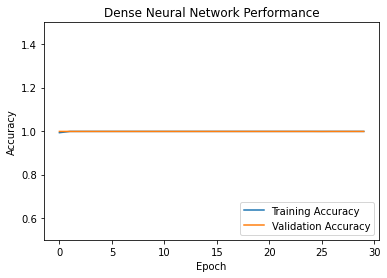

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.5])
plt.title("Dense Neural Network Performance")
plt.legend(loc='lower right')

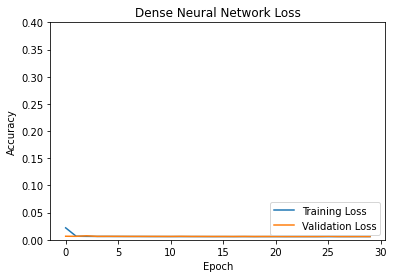

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.4])
plt.title("Dense Neural Network Loss")
plt.legend(loc='lower right')

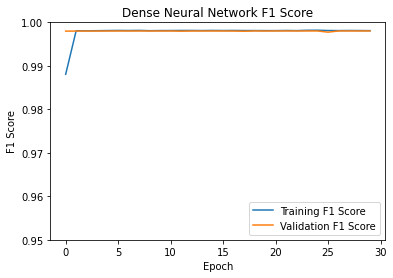

In [ ]:
plt.plot(history.history['f1_metric'], label='Training F1 Score')
plt.plot(history.history['val_f1_metric'], label = 'Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.ylim([0.95, 1])
plt.title("Dense Neural Network F1 Score")
plt.legend(loc='lower right')

# **Neural Network - LSTM**

In [ ]:
# Define parameter
n_lstm = 128
drop_lstm = 0.2
# Define LSTM Model 
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
lstm_model.add(SpatialDropout1D(drop_lstm))
lstm_model.add(LSTM(n_lstm, return_sequences=False))
lstm_model.add(Dropout(drop_lstm))
lstm_model.add(Dense(1, activation='sigmoid'))

In [ ]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            8000      
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 16)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 82,369
Trainable params: 82,369
Non-trainable params: 0
__________________________________________________

In [ ]:
lstm_model.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy',f1_metric])

In [ ]:
num_epochs = 10
early_stop = EarlyStopping(monitor='val_loss', patience=2)
lstm_history = lstm_model.fit(training_padded,
                     y_train,
                     epochs=num_epochs, 
                     validation_data=(testing_padded, y_test),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/10
12571/12571 - 91s - loss: 0.1564 - accuracy: 0.9089 - f1_metric: 0.8167 - val_loss: 0.0128 - val_accuracy: 0.9980 - val_f1_metric: 0.9976 - 91s/epoch - 7ms/step
Epoch 2/10
12571/12571 - 87s - loss: 0.0132 - accuracy: 0.9972 - f1_metric: 0.9967 - val_loss: 0.0074 - val_accuracy: 0.9982 - val_f1_metric: 0.9978 - 87s/epoch - 7ms/step
Epoch 3/10
12571/12571 - 90s - loss: 0.0080 - accuracy: 0.9980 - f1_metric: 0.9976 - val_loss: 0.0064 - val_accuracy: 0.9983 - val_f1_metric: 0.9980 - 90s/epoch - 7ms/step
Epoch 4/10
12571/12571 - 87s - loss: 0.0067 - accuracy: 0.9983 - f1_metric: 0.9980 - val_loss: 0.0064 - val_accuracy: 0.9983 - val_f1_metric: 0.9979 - 87s/epoch - 7ms/step
Epoch 5/10
12571/12571 - 92s - loss: 0.0065 - accuracy: 0.9983 - f1_metric: 0.9980 - val_loss: 0.0065 - val_accuracy: 0.9982 - val_f1_metric: 0.9978 - 92s/epoch - 7ms/step
Epoch 6/10
12571/12571 - 90s - loss: 0.0063 - accuracy: 0.9984 - f1_metric: 0.9981 - val_loss: 0.0063 - val_accuracy: 0.9983 - val_f1_metric

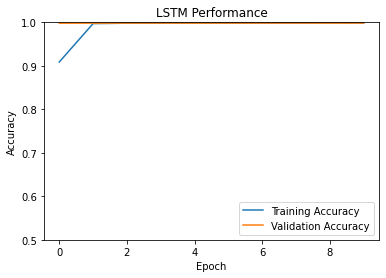

In [ ]:
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title("LSTM Performance")
plt.legend(loc='lower right')

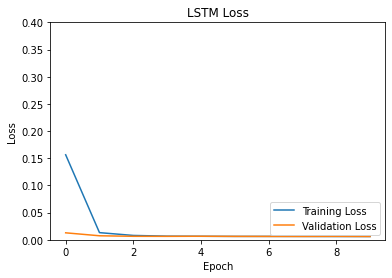

In [ ]:
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.4])
plt.title("LSTM Loss")
plt.legend(loc='lower right')

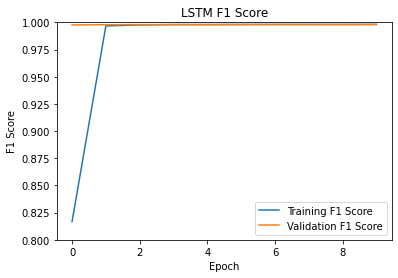

In [ ]:
plt.plot(lstm_history.history['f1_metric'], label='Training F1 Score')
plt.plot(lstm_history.history['val_f1_metric'], label = 'Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.ylim([0.8, 1])
plt.title("LSTM F1 Score")
plt.legend(loc='lower right')

In [ ]:
lstm_model.evaluate(testing_padded, y_test)

5388/5388 [==============================] - 27s 5ms/step - loss: 0.0061 - accuracy: 0.9983 - f1_metric: 0.9980


[0.006129213143140078, 0.9983409643173218, 0.9980104565620422]

Model Comparisions:

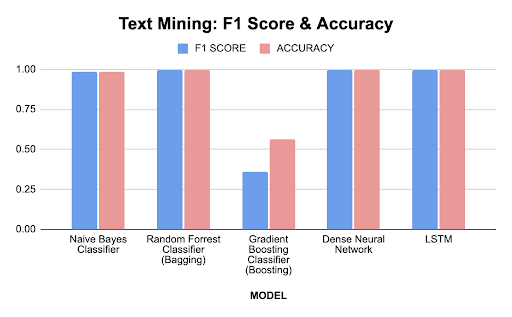

# **References:**


1.   https://medium.com/mlearning-ai/the-classification-of-text-messages-using-lstm-bi-lstm-and-gru-f79b207f90ad
2.   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
4. https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/



